Saving IBM_analysis.csv to IBM_analysis.csv
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfacti

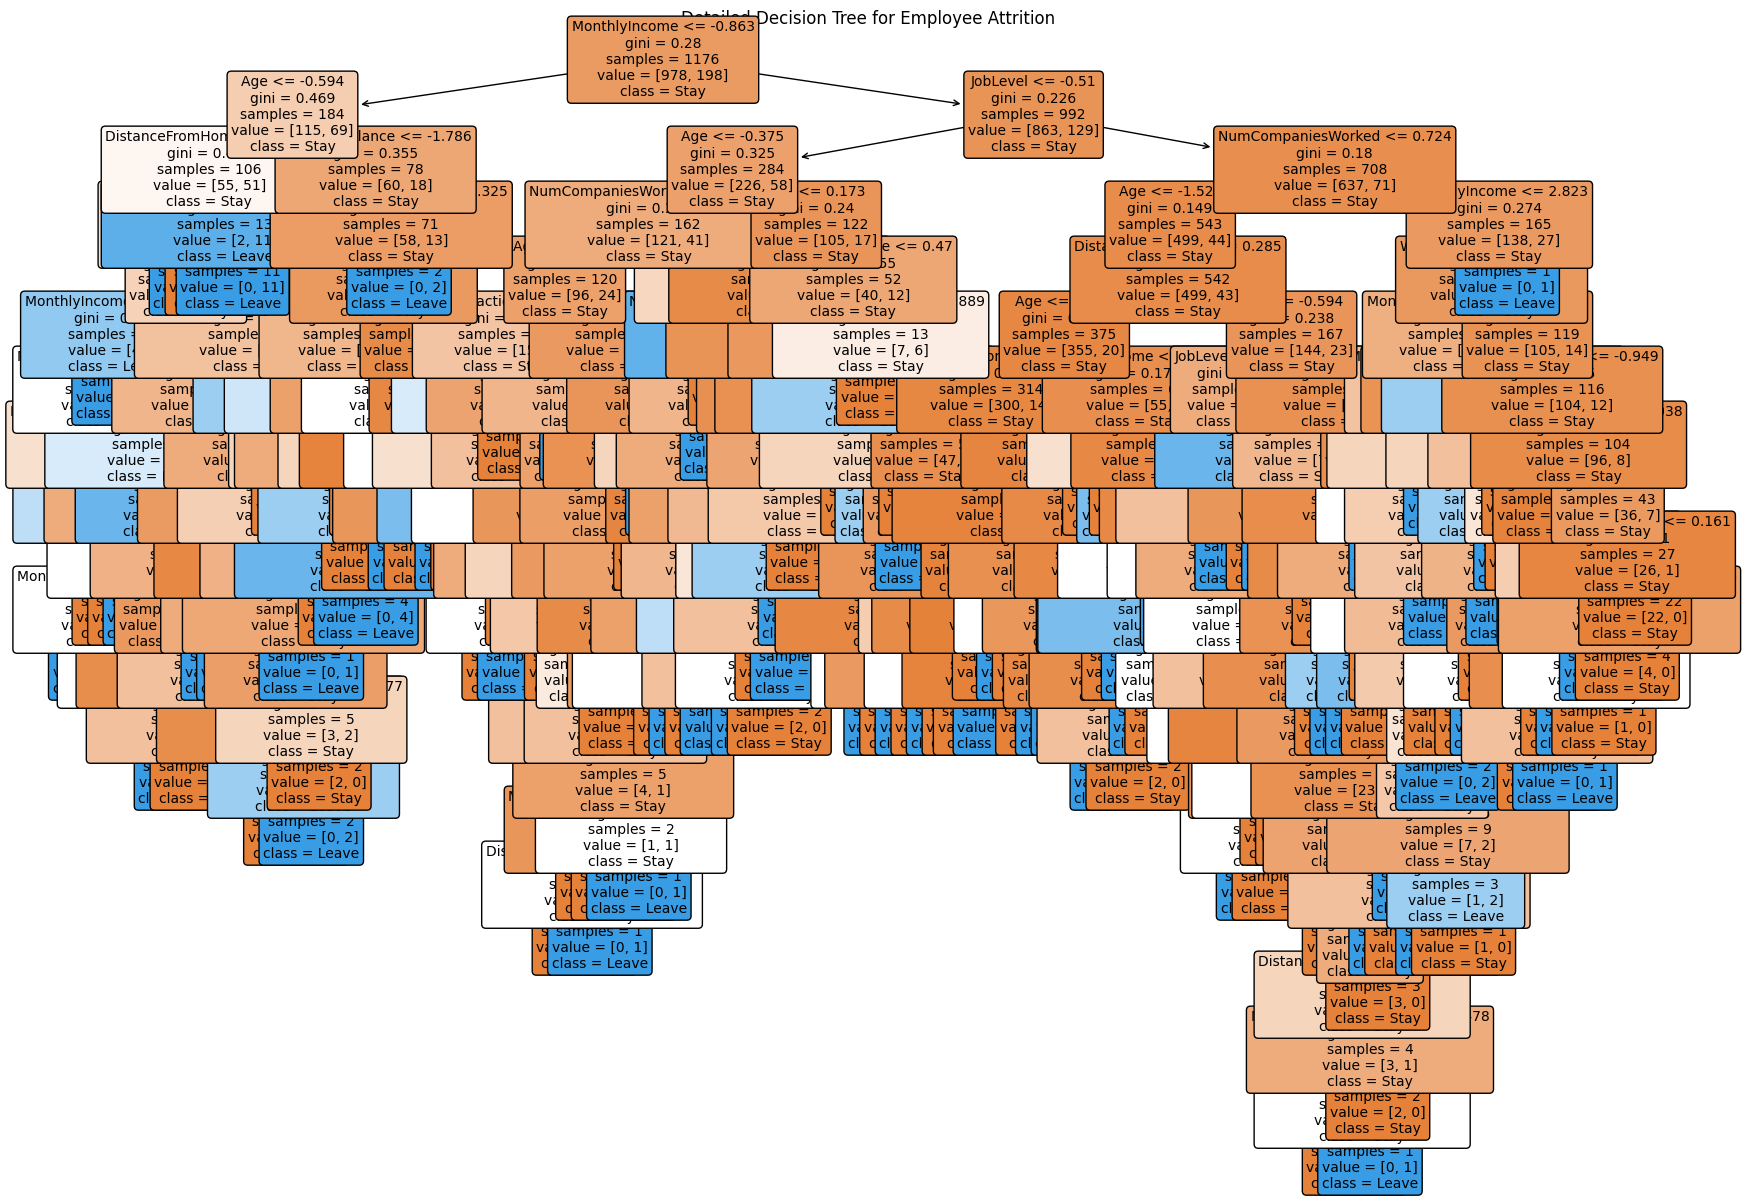

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn import tree
import matplotlib.pyplot as plt
from google.colab import files

# Upload the CSV file from your device
uploaded = files.upload()

# Automatically get the name of the uploaded file
file_name = list(uploaded.keys())[0]

# Load the dataset using the correct file name
data = pd.read_csv(file_name)

# Preview the dataset
print(data.head())

# Preprocessing
# Encode target variable 'Attrition'
label_enc = LabelEncoder()
data['Attrition'] = label_enc.fit_transform(data['Attrition'])

# Encode categorical columns
data['OverTime'] = label_enc.fit_transform(data['OverTime'])  # Encoding 'OverTime' as it is a categorical feature
data['JobRole'] = label_enc.fit_transform(data['JobRole'])  # Encoding 'JobRole' as it is a categorical feature

# Feature Engineering: Select relevant features
# Adding more features to enhance tree complexity
features = ['JobSatisfaction', 'MonthlyIncome', 'DistanceFromHome', 'PerformanceRating',
            'Age', 'JobLevel', 'WorkLifeBalance', 'NumCompaniesWorked']
X = data[features]
y = data['Attrition']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier with higher complexity
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20,15))
tree.plot_tree(clf, feature_names=features, class_names=['Stay', 'Leave'], filled=True, rounded=True, fontsize=10)
plt.title('Detailed Decision Tree for Employee Attrition')
plt.show()